In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/opisthofulax/PhD/projects/ising-model


In [2]:
pthconfig = "res/config/.config_acf_compute"
df = pd.read_csv(pthconfig)
df

,tMC,N_M,_m_sav,Navg,L1,L2,Ls,b_m,b_M,b_s,_m_init,_m_upd,_m_mea
0,1,10000,0,10,10,10,10,0.01,0.44,0.02,cs_unif,algo_metro,1


In [4]:
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
Nlst = []
while (N <= df['N_M'][0]):
    Nlst.append(N)
    L1 += df['Ls'][0]
    L2 += df['Ls'][0]
    N = L1 * L2;
betalst = np.arange(df['b_m'][0], df['b_M'][0], df['b_s'][0])

(-1.0, 1.0)

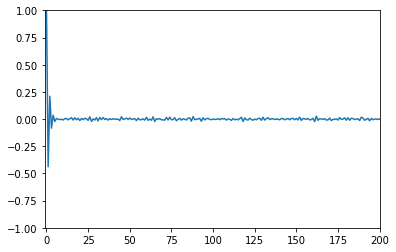

In [35]:
pth = f"res/obs/N=900/bt=0.17/ACF_avg=10.bin"
acf = np.fromfile(pth, dtype=np.double)
plt.plot(acf, '-')
plt.xlim(-1,200)
plt.ylim(-1, 1)

In [5]:
for N in [900]:
    for beta in betalst:
        pth = f"res/obs/N={N:d}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
        acf = np.fromfile(pth, dtype=np.double)
        print(N, beta, acf)

900 0.01 [ 1.00000000e+000 -9.93596846e-001  9.87196375e-001 -9.80843062e-001
  9.74524941e-001 -9.68227257e-001  9.61948562e-001 -9.55711750e-001
  9.49512410e-001 -9.43365005e-001  9.37194003e-001 -9.31081518e-001
  9.24990781e-001 -9.18957300e-001  9.12915951e-001 -9.06917474e-001
  9.00927082e-001 -8.95019194e-001  8.89104275e-001 -8.83229365e-001
  8.77381431e-001 -8.71573386e-001  8.65776441e-001 -8.59998309e-001
  8.54217115e-001 -8.48472879e-001  8.42744778e-001 -8.37047848e-001
  8.31367553e-001 -8.25762481e-001  8.20157292e-001 -8.14573723e-001
  8.08992102e-001 -8.03476317e-001  7.97994215e-001 -7.92554236e-001
  7.87128465e-001 -7.81757839e-001  7.76462237e-001 -7.71197115e-001
  7.65939177e-001 -7.60742610e-001  7.55556415e-001 -7.50428993e-001
  7.45311935e-001 -7.40255319e-001  7.35228036e-001 -7.30237819e-001
  7.25230002e-001 -7.20294628e-001  7.15395499e-001 -7.10526908e-001
  7.05703526e-001 -7.00898765e-001  6.96100649e-001 -6.91351077e-001
  6.86593940e-001 -6.8188

In [ ]:
import matplotlib as mpl
color = plt.cm.rainbow(np.linspace(0, 1, len(Nlst)))
norm = mpl.colors.Normalize(vmin=min(betalst), vmax=max(betalst))
cmap = plt.cm.plasma
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
for N in [900]:
    for beta in betalst:
        pth = f"res/obs/N={N:d}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
        acf = np.fromfile(pth, dtype=np.double)
        midx = np.argmax(acf<1/np.exp(1))
        x = np.linspace(1, midx, num=midx)
        plt.plot(x, acf[:midx], '-', color=m.to_rgba(beta), label=fr"beta={beta:.3g}")
# handles, labels = plt.gca().get_legend_handles_labels()
# newLabels, newHandles = [], []
# for handle, label in zip(handles, labels):
#   if label not in newLabels:
#     newLabels.append(label)
#     newHandles.append(handle)
# plt.legend(newHandles, newLabels, bbox_to_anchor=(1.0, 1.05))
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()
plt.xlim(0, 100)